#Conexión

In [0]:
restart_python

In [0]:
pip install azure-storage-blob

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install imbalanced-learn

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install matplotlib

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install seaborn

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Librerias

In [0]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io

Datos de acceso

In [0]:
account_url= 'https://almacenamientoclase1.blob.core.windows.net/'
container_nameraw= 'rawzone'
container_namebronze= 'bronzezone'
container_namesilver= 'silverzone'
container_namegolden= 'goldenzone'
blob_nameraw = 'heart_clase.csv'
blob_namebronze = 'bronze.csv'
blob_namesilver = 'silver.csv'
blob_namegolden = 'golden.csv'
account_key = 'QbAb8E2ReBwO5oP4aEGskbYRiXKhYl0BhLejPiZWB/RXqnML/FXtTHB8smAuOnJs4MNmd1Ek1YEl+AStAznP7Q=='

Conexión

In [0]:

# Crea el cliente del servicio de blob
blob_service_client = BlobServiceClient(account_url=account_url, credential=account_key)

# Obtén una referencia al contenedor
container_client = blob_service_client.get_container_client('rawzone')

# Descarga el archivo CSV como un objeto BlobClient
blob_client = container_client.get_blob_client(blob_nameraw)

Extracción de df

In [0]:
# Lee el contenido del archivo CSV
content = blob_client.download_blob().readall()
df = pd.read_csv(io.BytesIO(content))

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


#Limpieza Preeliminar

In [0]:
print('thal',df['thal'].unique())

thal ['fixed' 'normal' 'reversible' '1' '2']


Arreglo del campo 'thal' acorde a documentación:
normal 0 fixed 1 reversible 2

In [0]:
df['thal'] = df['thal'].replace(['normal'],'0')
df['thal'] = df['thal'].replace(['fixed'],'1')
df['thal'] = df['thal'].replace(['reversible'],'2')

In [0]:
df['thal'] = pd.to_numeric(df['thal'])

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [0]:
container_clientbronze = blob_service_client.get_container_client('bronzezone')
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False)
csv_content = csv_buffer.getvalue()
blob_client = container_clientbronze.get_blob_client(blob_namebronze)
blob_client.upload_blob(csv_content, overwrite=True)

{'etag': '"0x8DC823D9230C5A2"',
 'last_modified': datetime.datetime(2024, 6, 1, 13, 20, 13, tzinfo=datetime.timezone.utc),
 'content_md5': bytearray(b'\xe4\xe4\xed\x1e\xb2:\xa7\xb6\x16\xac\xa6PyMI\xe1'),
 'client_request_id': 'adf5519a-2019-11ef-bae9-00163ef6ebd2',
 'request_id': '8f7bedb9-901e-005c-5926-b4d428000000',
 'version': '2023-11-03',
 'version_id': None,
 'date': datetime.datetime(2024, 6, 1, 13, 20, 13, tzinfo=datetime.timezone.utc),
 'request_server_encrypted': True,
 'encryption_key_sha256': None,
 'encryption_scope': None}

##  **CheckPoint bronzezone

#Analisis Exploratorio

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [0]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.828383,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.954383,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [0]:
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']]
df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]

##Relación Variable Objetivo

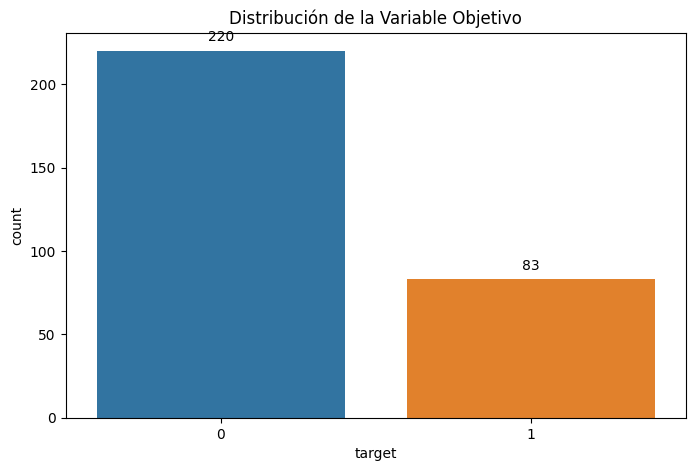

In [0]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='target', data=df)
plt.title('Distribución de la Variable Objetivo')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

##Variables Numericas

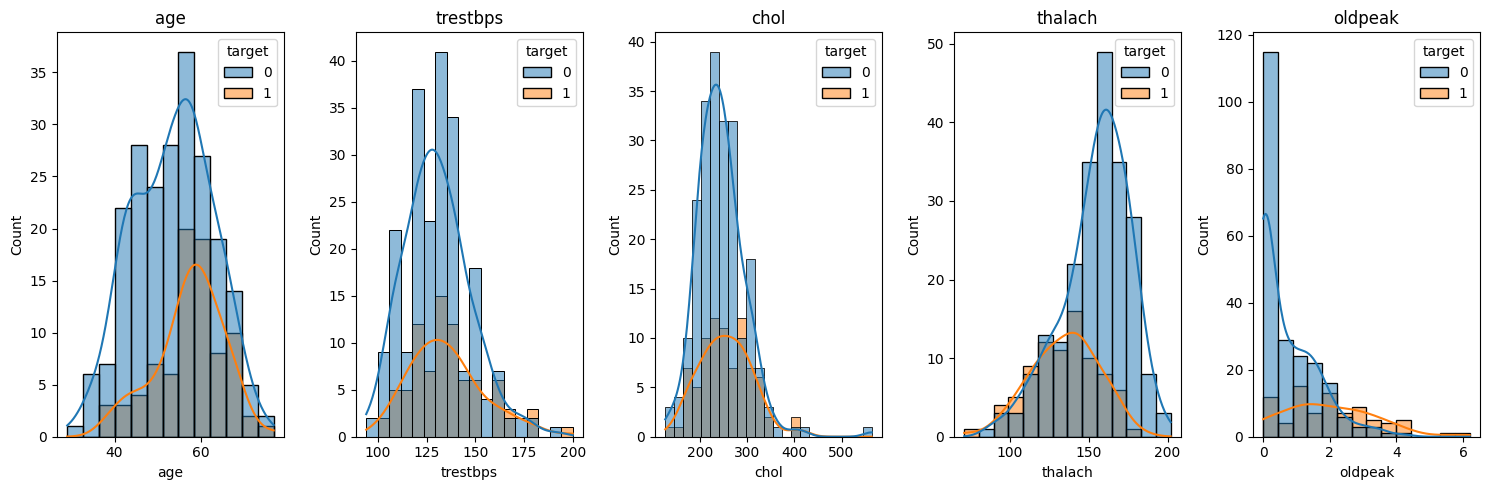

In [0]:
def graficar_histogramas_seaborn(df,columnas,filas,alto):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, alto))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
       if col != 'target':
        sns.histplot(df, x = col,hue = 'target', ax=axes[i],kde=True)
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
graficar_histogramas_seaborn(df_num,5,1,5)

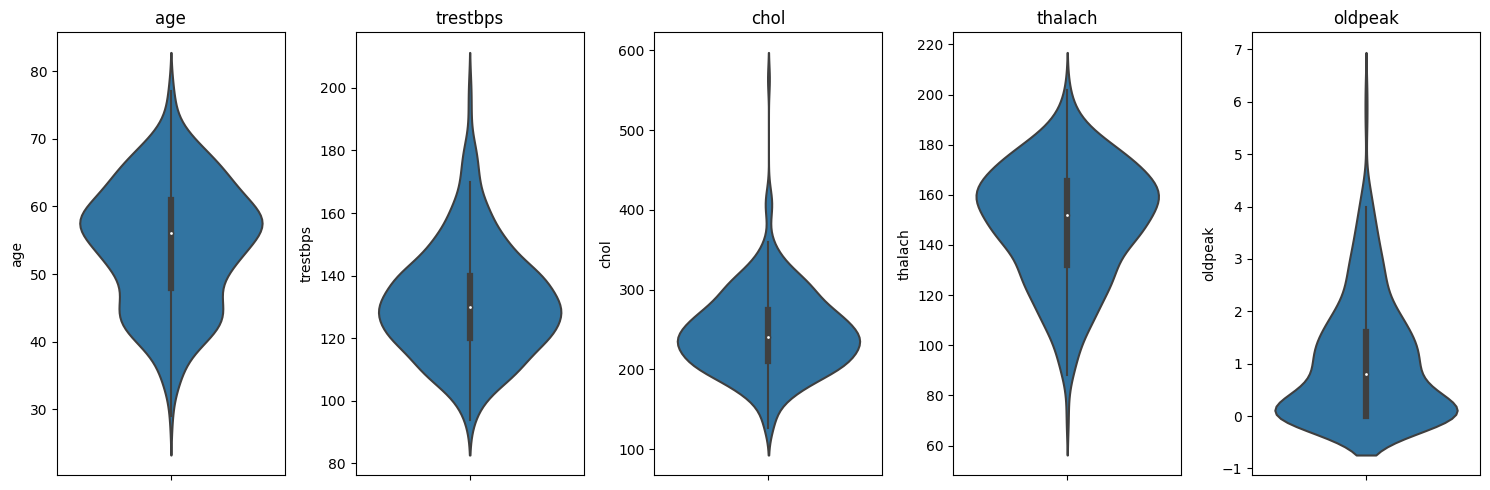

In [0]:
def graficar_violinplot_seaborn(df,columnas,filas,alto):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, alto))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
       if col != 'target':
        sns.violinplot(data=df, y = col, ax=axes[i],hue='target')
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

graficar_violinplot_seaborn(df_num,5,1,5)

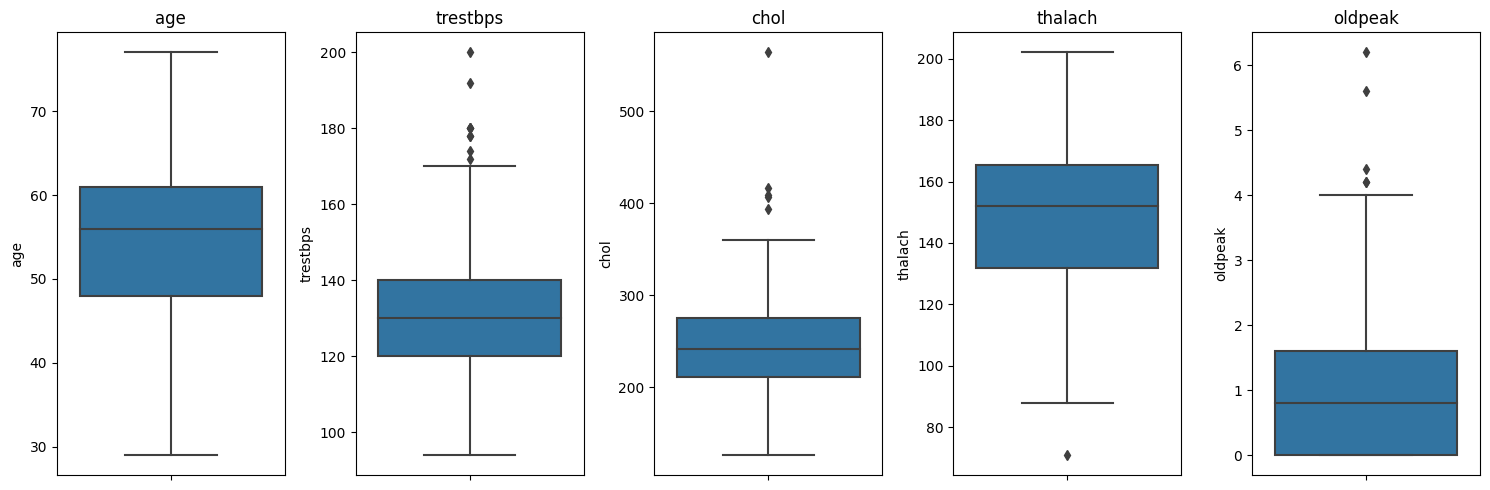

In [0]:
def graficar_boxplot_seaborn(df,columnas,filas,alto):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, alto))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
       if col != 'target':
        sns.boxplot(data=df, y = col, ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

graficar_boxplot_seaborn(df_num,5,1,5)

/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

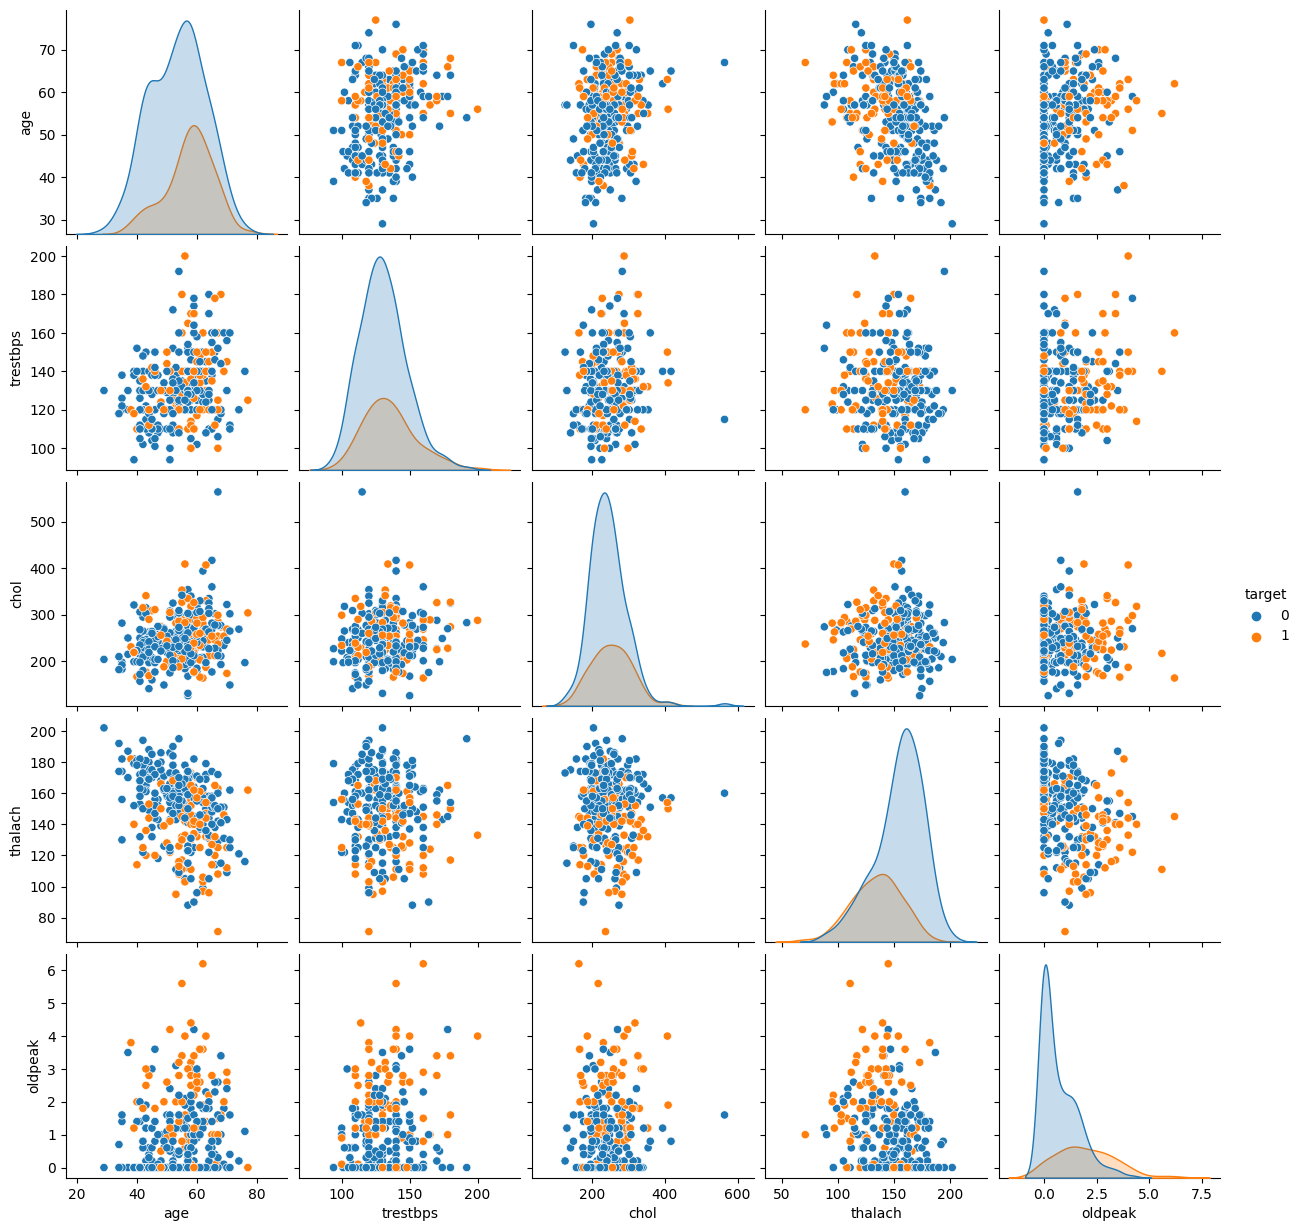

In [0]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_num ,hue='target')
plt.show()

##Variables Categoricas

**CountPlot**

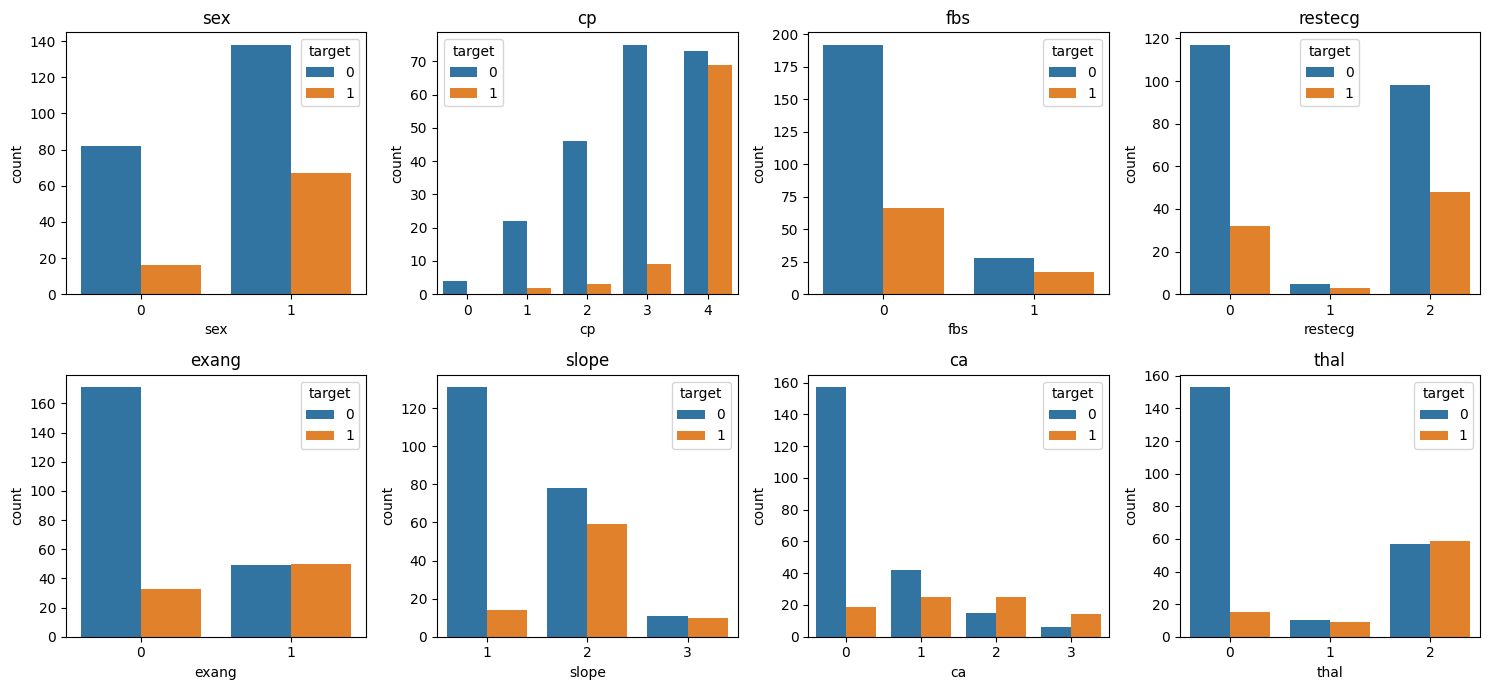

In [0]:
def graficar_countplot_seaborn(df,columnas,filas,alto):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, alto))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
       if col != 'target':
        sns.countplot(data=df, x = col,hue = 'target', ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

graficar_countplot_seaborn(df_cat,4,2,7)

<Axes: >

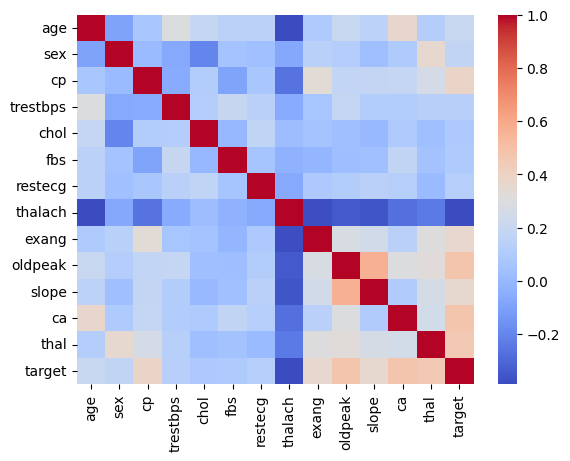

In [0]:
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')

#Preprocesamiento de Datos

In [0]:
x = df.drop('target', axis=1)
y = df['target']

<Axes: >

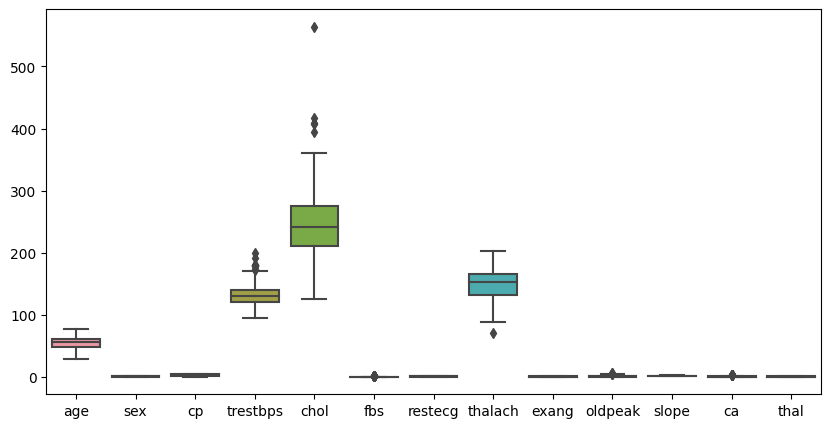

In [0]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=x)

###Outliers

In [0]:
def replace_outliers(df_in, col_name):

    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    col_mean = df_in[col_name].mean()

    df_in.loc[df_in[col_name] < fence_low, col_name] = q1
    df_in.loc[df_in[col_name] > fence_high, col_name] = q3

    return df_in

In [0]:
x = replace_outliers(x,'chol')
x = replace_outliers(x,'trestbps')
x = replace_outliers(x,'thalach')
x = replace_outliers(x,'oldpeak')

###Equilibrar variables

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
smote = SMOTE(random_state=42)

x, y = smote.fit_resample(x, y)

x = pd.DataFrame(x, columns=x.columns)
y = pd.DataFrame(y, columns=['target'])


In [0]:
print(y['target'].value_counts().reset_index())

   index  target
0      0     220
1      1     220


###Estandarizar

In [0]:
#estandarizador
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessorall = Pipeline(
    steps=[("scaler", StandardScaler())])

In [0]:
x_scaled = preprocessorall.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [0]:
df_processed = pd.concat([x_scaled, y], axis=1)

<Axes: >

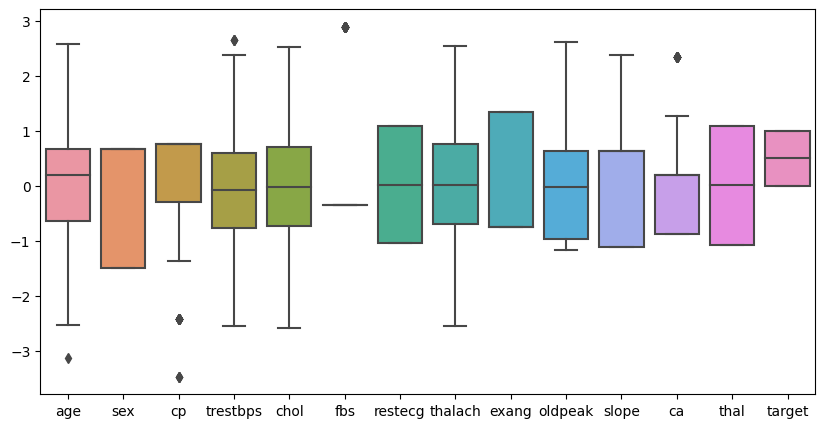

In [0]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_processed)

In [0]:
x = x_scaled

In [0]:
df_processed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.913529,0.675983,-2.408124,0.942941,-0.239885,2.891661,1.085545,0.227885,-0.748521,1.014721,2.386895,-0.873278,0.012277,0
1,1.387391,0.675983,0.757935,1.966191,0.914018,-0.345822,1.085545,-1.643724,1.335968,0.259342,0.639418,2.337660,-1.068132,1
2,1.387391,0.675983,0.757935,-0.762476,-0.326972,-0.345822,1.085545,-0.707919,1.335968,1.297988,0.639418,1.267347,1.092687,0
3,-2.166570,0.675983,-0.297418,-0.080310,0.130235,-0.345822,-1.042027,1.876684,-0.748521,2.147789,2.386895,-0.873278,-1.068132,0
4,-1.692708,-1.479326,-1.352771,-0.080310,-0.871266,-0.345822,1.085545,1.208252,-0.748521,0.164920,-1.108059,-0.873278,-1.068132,0


In [0]:
container_clientsilver= blob_service_client.get_container_client('silverzone')
csv_buffer = io.StringIO()
df_processed.to_csv(csv_buffer, index=False)
csv_content = csv_buffer.getvalue()
blob_client = container_clientsilver.get_blob_client(blob_namesilver)
blob_client.upload_blob(csv_content, overwrite=True)

{'etag': '"0x8DC823D9F1F3DF3"',
 'last_modified': datetime.datetime(2024, 6, 1, 13, 20, 35, tzinfo=datetime.timezone.utc),
 'content_md5': bytearray(b'v\xedv\x11\x97\x9f\x11\xbeqB\x1c\x80_{\xebx'),
 'client_request_id': 'babe4b16-2019-11ef-bae9-00163ef6ebd2',
 'request_id': '8f7c0c8a-901e-005c-4926-b4d428000000',
 'version': '2023-11-03',
 'version_id': None,
 'date': datetime.datetime(2024, 6, 1, 13, 20, 34, tzinfo=datetime.timezone.utc),
 'request_server_encrypted': True,
 'encryption_key_sha256': None,
 'encryption_scope': None}

##**CheckPoint Silverzone

#Creación de Modelos

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

###Separación de conjuntos

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [0]:
print('Distribución Entrenamiento:')
print(y_train.value_counts())

print('\nDistribución Pruebaa:')
print(y_test.value_counts())


Distribución Entrenamiento:
target
0         179
1         173
dtype: int64

Distribución Pruebaa:
target
1         47
0         41
dtype: int64


###Modelos de prueba

In [0]:
models = {
   "Logistic Regression": LogisticRegression(max_iter=1000),
   "Decision Tree": DecisionTreeClassifier(),
   "K-Nearest Neighbors": KNeighborsClassifier(),
   "Random Forest": RandomForestClassifier(),
   "SVM": SVC(),
   "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [0]:
from sklearn.metrics import classification_report


results = {'Modelo': [], 'Precision_0': [], 'Recall_0': [], 'F1-score_0': [], 'Support_0': [],
           'Precision_1': [], 'Recall_1': [], 'F1-score_1': [], 'Support_1': [],
           'Accuracy': []}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results['Modelo'].append(name)
    results['Precision_0'].append(report['0']['precision'])
    results['Recall_0'].append(report['0']['recall'])
    results['F1-score_0'].append(report['0']['f1-score'])
    results['Support_0'].append(report['0']['support'])
    results['Precision_1'].append(report['1']['precision'])
    results['Recall_1'].append(report['1']['recall'])
    results['F1-score_1'].append(report['1']['f1-score'])
    results['Support_1'].append(report['1']['support'])
    results['Accuracy'].append(report['accuracy'])

df_results = pd.DataFrame(results)
df_results.head(6)

,Modelo,Precision_0,Recall_0,F1-score_0,Support_0,Precision_1,Recall_1,F1-score_1,Support_1,Accuracy
0,Logistic Regression,0.857143,0.878049,0.867470,41.0,0.891304,0.872340,0.881720,47.0,0.875000
1,Decision Tree,0.809524,0.829268,0.819277,41.0,0.847826,0.829787,0.838710,47.0,0.829545
2,K-Nearest Neighbors,0.871795,0.829268,0.850000,41.0,0.857143,0.893617,0.875000,47.0,0.863636
3,Random Forest,0.918919,0.829268,0.871795,41.0,0.862745,0.936170,0.897959,47.0,0.886364
4,SVM,0.972222,0.853659,0.909091,41.0,0.884615,0.978723,0.929293,47.0,0.920455
5,XGBoost,0.875000,0.853659,0.864198,41.0,0.875000,0.893617,0.884211,47.0,0.875000


#Modelo SVM

##Hiperparametros

Hiperparametros recomendados de GridSearchCV

In [0]:
from sklearn.model_selection import cross_val_score
svm_model =SVC()
model = svm_model
scores = cross_val_score(model, df_processed.drop('target', axis=1), df_processed['target'], cv=5, scoring='accuracy')
for i, score in enumerate(scores):
    print(f"Partición {i+1}: {score}")
 
 
print("Promedio de puntajes:", scores.mean())
print("Desviación estándar:", scores.std())

Partición 1: 0.8636363636363636
Partición 2: 0.8295454545454546
Partición 3: 0.8863636363636364
Partición 4: 0.8522727272727273
Partición 5: 0.8977272727272727
Promedio de puntajes: 0.8659090909090909
Desviación estándar: 0.024266086936434776


In [0]:

from sklearn.model_selection import GridSearchCV

#listas de opciones de hiperparametros
param_grid = {
    'C': [0.1, 1, 2, 3, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 'scale']
}

svm_model = SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train.values.ravel())

# Obtiene los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utiliza los mejores hiperparámetros para ajustar el modelo
best_svm_model = SVC(**best_params,probability=True)
best_svm_model.fit(X_train, y_train.values.ravel())

# Realiza predicciones en el conjunto de prueba
y_pred1 = best_svm_model.predict(X_test)

# Imprime el informe de clasificación
report = classification_report(y_test, y_pred1)
print(report)


Mejores hiperparámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.87      0.98      0.92        47

    accuracy                           0.91        88
   macro avg       0.92      0.90      0.91        88
weighted avg       0.92      0.91      0.91        88



Ajustes propios de Hiperparametros

In [0]:
from sklearn.svm import SVC

svm_model = SVC(C=1, kernel='poly', gamma='scale',probability=True)

svm_model.fit(X_train, y_train.values.ravel())


y_pred2 = svm_model.predict(X_test)


report = classification_report(y_test, y_pred2)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.87      0.98      0.92        47

    accuracy                           0.91        88
   macro avg       0.92      0.90      0.91        88
weighted avg       0.92      0.91      0.91        88



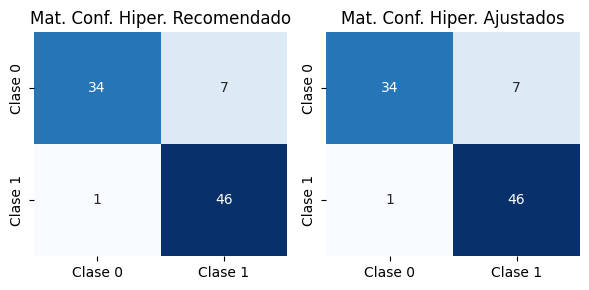

In [0]:

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

cm = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
class_names = ['Clase 0', 'Clase 1']

# Gráfico de calor para la matriz de confusión Hiperparametros recomendados
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False, ax=ax[0])
ax[0].set_title('Mat. Conf. Hiper. Recomendado')

# Gráfico de calor para la matriz de confusión Hiperparametros ajustados

sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar= False,ax=ax[1])
ax[1].set_title('Mat. Conf. Hiper. Ajustados')
plt.tight_layout()
plt.show()

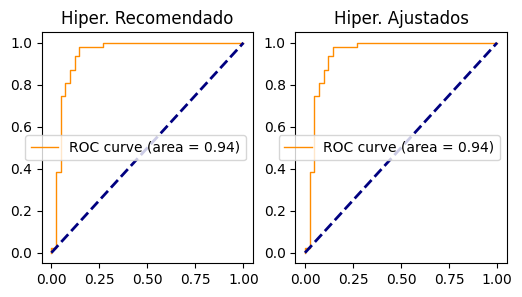

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
#curva roc hiperparametros recomendados
y_pred_proba1 = best_svm_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
roc_auc1 = auc(fpr1, tpr1)
roc_df1 = pd.DataFrame({'FPR': fpr1, 'TPR': tpr1})
#curva roc hiperparametros ajustados
y_pred_proba2 = svm_model.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)
roc_df2 = pd.DataFrame({'FPR': fpr2, 'TPR': tpr2})
#graficar
ax[0].plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc1)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_title('Hiper. Recomendado')
ax[0].legend()

ax[1].plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc2)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_title('Hiper. Ajustados')
ax[1].legend()
plt.show()

Una AUC de 0.93 es muy buena y una de 0.94 es un poco mejor, pero la diferencia no es sustancial, especialmente si las demás métricas (como precisión, recall, F1-score, etc.) muestran una mejora significativa en el modelo con AUC de 0.93.

#Nos quedamos con SVM_model y con los hiperparámetros recomendados en GridSearchCV 

Entrenamos el modelo con todo el DF dada la poca cantidad de registros para que se entrene con todo el conjunto

In [0]:
svm_model.fit(df_processed.drop('target', axis=1), df_processed['target'])
y_pred3 = svm_model.predict(df_processed.drop('target', axis=1))

In [0]:
report = classification_report(df_processed['target'], y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       220
           1       0.87      0.99      0.93       220

    accuracy                           0.92       440
   macro avg       0.93      0.92      0.92       440
weighted avg       0.93      0.92      0.92       440



Nuevo df con predicciones

In [0]:
#escalar
preprocessorall = Pipeline(
    steps=[("scaler", StandardScaler())])
df_inicial = preprocessorall.fit_transform(df.drop('target', axis=1))
df_inicial = pd.DataFrame(df_inicial, columns=x.columns)
 
#outliers
df_inicial = replace_outliers(df_inicial,'chol')
df_inicial = replace_outliers(df_inicial,'trestbps')
df_inicial = replace_outliers(df_inicial,'thalach')
df_inicial = replace_outliers(df_inicial,'oldpeak')
#df
df_inicial = pd.concat([df_inicial, df['target']], axis=1)

In [0]:
y_pred4 = svm_model.predict(df_inicial.drop('target', axis=1))

In [0]:
report = classification_report(df_inicial['target'], y_pred4)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       220
           1       0.67      1.00      0.80        83

    accuracy                           0.86       303
   macro avg       0.83      0.91      0.85       303
weighted avg       0.91      0.86      0.87       303



In [0]:
df_final = pd.concat([df, pd.DataFrame(y_pred4, columns=['prediccion'])], axis=1)

In [0]:
df_final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediccion
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0,0


In [0]:

container_clientgolden = blob_service_client.get_container_client('goldzone')
csv_buffer = io.StringIO()
df_final.to_csv(csv_buffer, index=False)
csv_content = csv_buffer.getvalue()
blob_client = container_clientgolden.get_blob_client(blob_namegolden)
blob_client.upload_blob(csv_content, overwrite=True)

{'etag': '"0x8DC823DA6338D64"',
 'last_modified': datetime.datetime(2024, 6, 1, 13, 20, 47, tzinfo=datetime.timezone.utc),
 'content_md5': bytearray(b'\xc6\x8bMa\xf9`\xbfU\x97ucY(\t\xf1\x13'),
 'client_request_id': 'c1f7833e-2019-11ef-bae9-00163ef6ebd2',
 'request_id': '8f7c21c7-901e-005c-3426-b4d428000000',
 'version': '2023-11-03',
 'version_id': None,
 'date': datetime.datetime(2024, 6, 1, 13, 20, 46, tzinfo=datetime.timezone.utc),
 'request_server_encrypted': True,
 'encryption_key_sha256': None,
 'encryption_scope': None}

#**checkpoint goldzone